## Develop a simple linear regression model using one variable
Link to the Youtube video tutorial: https://www.youtube.com/watch?v=8jazNUpO3lQ&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=2


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Training data preparation
Load the data (training data) available in the CSV file into pandas data frame

In [62]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### Visualization of training data 
Plot a scatter plot to get an idea on distribution of the data points (data loaded into the pandas data frame)

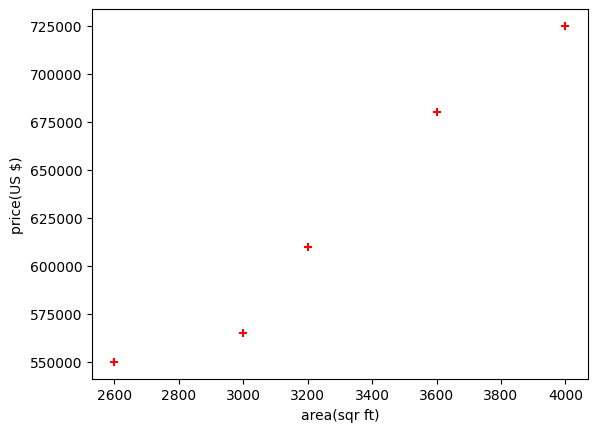

In [63]:
%matplotlib inline
plt.xlabel('area(sqr ft)') # Label the x-axis of the scatter plot
plt.ylabel('price(US $)') # Label the y-axis of the scatter plot
plt.scatter(df.area,df.price,color='red',marker='+') # Plot the area data (part of data loaded into the data frame) as x-axis, price data (part of data loaded into the data frame) as y-axis, set data point colour as red, set data point appearance as +

### Train a linear regression model with training data available

In [64]:
reg = linear_model.LinearRegression() # create an object for linear regression 
reg.fit(df[['area']], df.price) # train the linear regression model with available data (fit the data). The first argument (independent variable of training data) has to be 2D array. Here, the first argument is a data frame which only contains area. The second argument (dependent variable of training data) is price.

LinearRegression()

Now this linear regression model is ready to make prediction over the dependent variable (EG: prices in this case). 
Here, we verify the trained model by using it to make a prediction over an independent data (EG: 3300 sqr ft).

In [65]:
reg.predict([[3300]]) # Use the trained linear regression model to do prediction. The input/independent variable must be in 2D array, using [[]]. Here, this model predict the price based on area of 3300sqr ft

c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

### (Not related to linear regression model development: Extra information, can ignore this section)
When training a linear regression model, the model compute the coefficient(m) and intercept(b) of its linear equation based on the data available. The computed coefficient and intercept will be used to predict the dependent variable when an independent variable is given.

![title](hidden/photo.png)

In [66]:
reg.coef_ # show the coefficient computed by the model during its training

array([135.78767123])

In [67]:
reg.intercept_ # show the intercept computed by the trained model during its training

180616.43835616432

Verify the linear regression equation concept by constructing a linear equation manually with computed coefficient, computed intercept, and same independent value for prediction. The output of this manually constructed linear equation should match the prediction made by the linear regression model for any given independent variable.

In [68]:
y=135.78767123*3300+180616.43835616432 # manually construct the linear equation that represents the trained linear regression model  
print(y) # show the output of the manually constructed linear equation

628715.7534151643


### Apply the trained linear regression model for predictions
Make predictions over given independent variable and save the results in a CSV file

In [69]:
d = pd.read_csv("areas.csv") # create a data frame with data available in the CSV file (load the data available in the CSV file into pandas data frame )
d.head(3) # show the data located at the first 3 row of the data frame called d

,area
0,1000
1,1500
2,2300


In [70]:
p = reg.predict(d) # use the trained linear regression model to make prediction over each independent data (EG: Area here) available in the data frame. Then store the results into variable p.

d['prices'] = p # Create a new column with a label called prices in the data frame called d, then assign the data stored in variable p to the new column created
print(d) # show all the predictions made by the model which saved in the data frame called d

    area        prices
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06


### Export results

In [71]:
d.to_csv("prediction.csv", index=False) # export the data frame (Intuitive explanation: the data available in the data frame) as a CSV file called prediction.csv, without the index column in the same folder

### Visualization of the trained linear regression model based on the training data

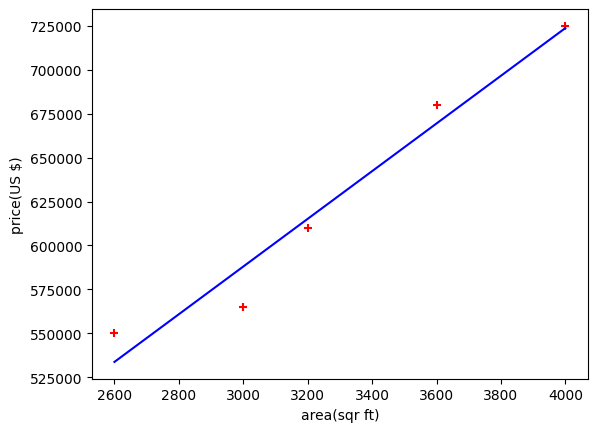

In [72]:
plt.xlabel('area(sqr ft)') # Label the x-axis of the scatter plot
plt.ylabel('price(US $)') # Label the y-axis of the scatter plot
plt.scatter(df.area,df.price,color='red',marker='+') # Plot the area data (part of data loaded into the data frame) as x-axis, price data (part of data loaded into the data frame) as y-axis, set data point colour as red, set data point appearance as +
# Visualize how the trained linear regression model (equation line) looks like,
# by plotting a line with independent variable of df data frame as x-axis, prediction made by the model over each independent data of the df data frame as y-axis. Set the line color as blue.
plt.plot(df.area,reg.predict(df[["area"]]),color='blue') 